# Karamoja Crop Yields EDA

This notebook involves studying and understanding the crop yields in Karamoja, which is one of the most insecure food regions in Uganda. The region has a low level productivity due to intense droughts as well as pest and disease outbreak. Datasets obtained from Dalberg Data Insights, regarding this case study shall be used in the development of a new food security monitoring tool to support farmers and NGOs experiencing extremely low yields.

## Objectives:

* Understand the goal of this project
* Load the inherent datasets
* Data studying and comprehension of data
* Data transformation and cleaning(if applicable)
* Exploratory data analysis of data
* Findings and evaluations

This project uses datasets from by Dalberg Data Insights, who developed a methodology to *remotely measure the yield of the two main staple crops of the region* (i.e. sorghum and maize) based on satellite images. The datasets are two files that contain information at the Subcounty and District level respectively. These datasets will help us understand the yield of each staple crop relative factors that affect the yield as well as the demographics of the specified regions. Such information can furthermore help us formulate recommendations which is solutions that involve mitigating extremely low crop yields with the support of NGOS.

### Data Loading and Comprehension

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The datasets used for this project are : `Uganda_Karamoja_District_Crop_Yield_Population.csv` and `Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv` found in the `DATA/TABLES` folder. The former contain yields at the district level and the latter has yields at the subcounty level.

In [23]:
# loading dataset for districts
district = pd.read_csv("DATA/TABLES/Uganda_Karamoja_District_Crop_Yield_Population.csv")
district.head()

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468


In [3]:
# loading dataset for subcountry
sc = pd.read_csv("DATA/TABLES/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv")
sc.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [4]:
# checking metadata:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OBJECTID      7 non-null      int64  
 1   NAME          7 non-null      object 
 2   POP           7 non-null      int64  
 3   Area          7 non-null      int64  
 4   S_Yield_Ha    7 non-null      int64  
 5   M_Yield_Ha    7 non-null      int64  
 6   Crop_Area_Ha  7 non-null      float64
 7   S_Area_Ha     7 non-null      float64
 8   M_Area_Ha     7 non-null      float64
 9   S_Prod_Tot    7 non-null      int64  
 10  M_Prod_Tot    7 non-null      int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 744.0+ bytes


In [5]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OBJECTID        52 non-null     int64  
 1   SUBCOUNTY_NAME  52 non-null     object 
 2   DISTRICT_NAME   52 non-null     object 
 3   POP             52 non-null     int64  
 4   Area            52 non-null     int64  
 5   Karamoja        52 non-null     object 
 6   S_Yield_Ha      52 non-null     float64
 7   M_Yield_Ha      52 non-null     float64
 8   Crop_Area_Ha    52 non-null     float64
 9   S_Area_Ha       52 non-null     float64
 10  M_Area_Ha       52 non-null     float64
 11  S_Prod_Tot      52 non-null     float64
 12  M_Prod_Tot      52 non-null     float64
dtypes: float64(7), int64(3), object(3)
memory usage: 5.4+ KB


In [6]:
print(district.columns)
print(sc.columns)

Index(['OBJECTID', 'NAME', 'POP', 'Area', 'S_Yield_Ha', 'M_Yield_Ha',
       'Crop_Area_Ha', 'S_Area_Ha', 'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')
Index(['OBJECTID', 'SUBCOUNTY_NAME', 'DISTRICT_NAME', 'POP', 'Area',
       'Karamoja', 'S_Yield_Ha', 'M_Yield_Ha', 'Crop_Area_Ha', 'S_Area_Ha',
       'M_Area_Ha', 'S_Prod_Tot', 'M_Prod_Tot'],
      dtype='object')


In [7]:
sc.Karamoja.unique()

array(['Y'], dtype=object)

The codes above show that the `district` datasets has 7 records therefore involves information collected from 7 districts. The `sc` dataset has 52 records, collected from 52 sub-counties. `sc` dataset has two additional columns which, according to the column names, refer to the district which the respective subcounty is located and a 'karamoja' column which asserts the location of the records collected as shown by the single unique value of 'Y' i.e. *yes*.
The dtype of data in each column is respective to what is portray. No records have missing values.

### District Level Analysis

In [8]:
# printing district dataframe
district

,OBJECTID,NAME,POP,Area,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,92,ABIM,90385,2771977106,449,1040,5470.068394,3277.295971,1848.621855,1471506,1922567
1,96,AMUDAT,101790,1643582836,205,1297,5765.443719,2973.423860,2733.661014,609552,3545558
2,20,KAABONG,627057,7373606003,279,945,28121.672530,20544.194960,7394.416334,5731830,6987723
3,85,KOTIDO,243157,3641539808,331,1148,53032.649450,50247.443900,1751.372284,16631904,2010575
4,5,MOROTO,127811,3570160948,128,355,5954.814048,4741.748776,1190.050606,606944,422468
5,54,NAKAPIRIPIRIT,146780,4216323900,356,1264,26372.698490,19237.333210,6425.788414,6848491,8122197
6,80,NAPAK,167625,4508782023,137,854,22944.296020,16142.015880,6543.719066,2211456,5588336


In [89]:
# grouping population by name in ascending values.
# kaabong has the largest population
district.groupby('POP')['NAME'].max()

POP
90385              ABIM
101790           AMUDAT
127811           MOROTO
146780    NAKAPIRIPIRIT
167625            NAPAK
243157           KOTIDO
627057          KAABONG
Name: NAME, dtype: object

In [91]:
# grouping by area
# kaabong has the largest area
district.groupby('Area')['NAME'].max()

Area
1643582836           AMUDAT
2771977106             ABIM
3570160948           MOROTO
3641539808           KOTIDO
4216323900    NAKAPIRIPIRIT
4508782023            NAPAK
7373606003          KAABONG
Name: NAME, dtype: object

In [92]:
# grouping by crop area
# Kotido has the largest cropping area per ha.
district.groupby('Crop_Area_Ha')['NAME'].max()

Crop_Area_Ha
5470.068394              ABIM
5765.443719            AMUDAT
5954.814048            MOROTO
22944.296020            NAPAK
26372.698490    NAKAPIRIPIRIT
28121.672530          KAABONG
53032.649450           KOTIDO
Name: NAME, dtype: object

In [93]:
# grouping by yields for sorghum
# which district produces the most sorghum yield
# Abim produces the most sorghum yield
district.groupby('S_Yield_Ha')['NAME'].max()

S_Yield_Ha
128           MOROTO
137            NAPAK
205           AMUDAT
279          KAABONG
331           KOTIDO
356    NAKAPIRIPIRIT
449             ABIM
Name: NAME, dtype: object

In [94]:
# grouping by yields for maize
# which district produces the most maize yield
# Amudat produces the most maize yield
district.groupby('M_Yield_Ha')['NAME'].max()

M_Yield_Ha
355            MOROTO
854             NAPAK
945           KAABONG
1040             ABIM
1148           KOTIDO
1264    NAKAPIRIPIRIT
1297           AMUDAT
Name: NAME, dtype: object

In [10]:
# yields of sorghum and maize
district[['S_Yield_Ha', 'M_Yield_Ha']]

,S_Yield_Ha,M_Yield_Ha
0,449,1040
1,205,1297
2,279,945
3,331,1148
4,128,355
5,356,1264
6,137,854


In [11]:
# difference of yields
district['S_M_yield_diff'] = district['M_Yield_Ha']- district['S_Yield_Ha']
district[['S_Yield_Ha', 'M_Yield_Ha', 'S_M_yield_diff']]

,S_Yield_Ha,M_Yield_Ha,S_M_yield_diff
0,449,1040,591
1,205,1297,1092
2,279,945,666
3,331,1148,817
4,128,355,227
5,356,1264,908
6,137,854,717


The codes aboves show some information regarding the minium and maximum values in area, population and yield, with reference to each district. Abim has one of the lowest cropping areas however produces the highest sorghum yield. Amudat follows closely in the croping area size being slightly larger than Abim but having the highest yield of maize.
Between the selected crops, maize evidently had a **higher yield** yield compared to sorghum per hectare. This is seen in the difference per yield. Maize evidently performs better. Maybe the cropping area for each crop affects how much yield each crop produces.

In [95]:
# cropping area for sorghum maximum
district['S_Area_Ha'].max()

50247.4439

In [96]:
# cropping area for maize maximum
district['M_Area_Ha'].max()

7394.4163340000005

In [97]:
# cropping area for sorghum minimum
district['S_Area_Ha'].min()

2973.4238600000003

In [98]:
# cropping area for maize minimum
district['M_Area_Ha'].min()

1190.050606

The values above show that alot of the cropping area is provided for sorghum farming. The large difference between the minimum and maximum of the sorghum cropping area attests to this. The maximum cropping area for maize is significantly less than the maximum cropping area for sorghum. However, maize yields more than sorghum. The division of cropping area needs to be revised.

In [113]:
#average production of sorghum
district['S_Prod_Tot'].mean()

4873097.571428572

In [114]:
#average production of maize
district['M_Prod_Tot'].mean()

4085632.0

In [115]:
# grouping by sorghum production by district
# Kotido has the largest sorghum production.
district.groupby('S_Prod_Tot')['NAME'].max()

S_Prod_Tot
606944             MOROTO
609552             AMUDAT
1471506              ABIM
2211456             NAPAK
5731830           KAABONG
6848491     NAKAPIRIPIRIT
16631904           KOTIDO
Name: NAME, dtype: object

In [116]:
# grouping by maize production by district
# Nakapiriprit has the largest maize production.
district.groupby('M_Prod_Tot')['NAME'].max()

M_Prod_Tot
422468            MOROTO
1922567             ABIM
2010575           KOTIDO
3545558           AMUDAT
5588336            NAPAK
6987723          KAABONG
8122197    NAKAPIRIPIRIT
Name: NAME, dtype: object

Maize despite having the highest yield, has less overall production than sorghum. The districts that have the highest crop production for both maize and sorghum are those with the largest(top 3) cropping area which include: Kotido, Kaabong and Nakapiripirit.

The correlation for between sorghum cropping area and total sorghum production is: 0.98
The correlation for between maize cropping area and total maize production is: 0.95


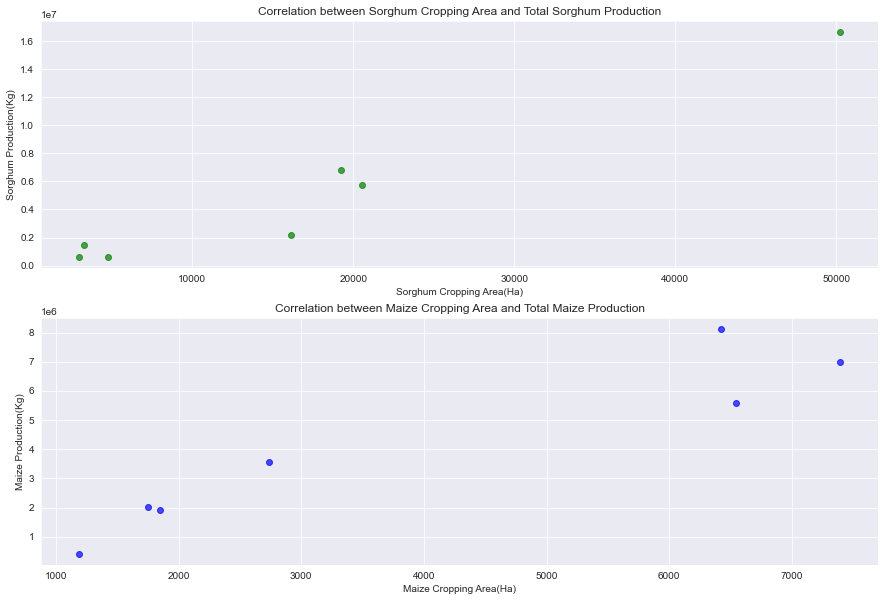

In [123]:
# checking for correlation between size of cropping area and cropping production per district.

s_area = district['S_Area_Ha']
m_area = district['M_Area_Ha']
s_prod = district['S_Prod_Tot']
m_prod = district['M_Prod_Tot']

s_corr = s_area.corr(s_prod)
m_corr = m_area.corr(m_prod)

print('The correlation for between sorghum cropping area and total sorghum production is:', round(s_corr,2))
print('The correlation for between maize cropping area and total maize production is:', round(m_corr,2))
#plotting scatter plot
fig, ax = plt.subplots(2, figsize=(15,10))

ax[0].scatter(s_area, s_prod, color='green', alpha=0.7)
ax[0].set_xlabel('Sorghum Cropping Area(Ha)')
ax[0].set_ylabel('Sorghum Production(Kg)')
ax[0].set_title('Correlation between Sorghum Cropping Area and Total Sorghum Production')

ax[1].scatter(m_area, m_prod, color='blue', alpha=0.7)
ax[1].set_xlabel('Maize Cropping Area(Ha)')
ax[1].set_ylabel('Maize Production(Kg)')
ax[1].set_title('Correlation between Maize Cropping Area and Total Maize Production');

Although not clear in the scatter plots above, the value of correlation for both maize and sorghum is close to 1 which shows that the correlation is **positive**. That means more area provided for the crop to be farmed results in more crop production.

### Subcounty level Analysis

In [132]:
#printing subcountry dataframe
sc.head()

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,600723.892900
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,959201.382500
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9991.488268
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,38971.659080
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,221609.511400


In [125]:
# grouping by crop area
# Kotido subcounty has the largest cropping area per ha.
sc.groupby('Crop_Area_Ha')['SUBCOUNTY_NAME'].max()

Crop_Area_Ha
0.171390                 SOUTHERN DIVISION
0.322316                 NORTHERN DIVISION
29.145760       NAKAPIRIPIRIT TOWN COUNCIL
60.772086              AMUDAT TOWN COUNCIL
145.243518                      KATIKEKILE
175.080527            KAABONG TOWN COUNCIL
401.797821                          LODIKO
698.171218                         LOTUKEI
788.462800               ABIM TOWN COUNCIL
792.249273              NAPAK TOWN COUNCIL
792.898789                         NYAKWAE
925.054130                         MORULEM
957.493946                           SIDOK
967.336727                    KAABONG WEST
997.161021                          KAMION
999.371589                            ABIM
1021.316990                  KAABONG  EAST
1031.196285                    LORENGECORA
1111.664207                          TAPAC
1161.390229                        MORUITA
1215.227445                      NGOLERIET
1266.109868                         ALEREK
1491.771813                         LOYOR

In [130]:
# grouping by sorghum yield
# NAMALU in NAKAPIRIPIRIT  has the largest sorghum yield kg per ha.
sc.groupby('S_Yield_Ha')[['SUBCOUNTY_NAME', 'DISTRICT_NAME']].max()

,SUBCOUNTY_NAME,DISTRICT_NAME
S_Yield_Ha,,
108.156411,LOPEEI,NAPAK
114.270921,RUPA,MOROTO
114.795569,SOUTHERN DIVISION,MOROTO
120.862232,LOKOPO,NAPAK
128.555598,LOTOME,NAPAK
130.007687,MATANY,NAPAK
131.977698,NORTHERN DIVISION,MOROTO
133.667936,NADUNGET,MOROTO
134.084089,NGOLERIET,NAPAK


In [131]:
# grouping by maize yield
# SIDOK in KAABONG has the largest maize yield kg per ha.
sc.groupby('M_Yield_Ha')[['SUBCOUNTY_NAME', 'DISTRICT_NAME']].max()

,SUBCOUNTY_NAME,DISTRICT_NAME
M_Yield_Ha,,
0.000000,SOUTHERN DIVISION,MOROTO
211.965635,TAPAC,MOROTO
241.538427,NORTHERN DIVISION,MOROTO
497.353282,MATANY,NAPAK
507.907068,LOTOME,NAPAK
528.699822,NGOLERIET,NAPAK
546.140294,KATIKEKILE,MOROTO
591.270355,NADUNGET,MOROTO
633.423182,KALAPATA,KAABONG


In [133]:
# grouping by sorghum prod
# KOTIDO in KOTIDO  has the largest sorghum production.
sc.groupby('S_Prod_Tot')[['SUBCOUNTY_NAME', 'DISTRICT_NAME']].max()

,SUBCOUNTY_NAME,DISTRICT_NAME
S_Prod_Tot,,
1.728126e+01,NORTHERN DIVISION,MOROTO
1.967487e+01,SOUTHERN DIVISION,MOROTO
6.464290e+02,NAKAPIRIPIRIT TOWN COUNCIL,NAKAPIRIPIRIT
8.522334e+03,AMUDAT TOWN COUNCIL,AMUDAT
9.379029e+03,KATIKEKILE,MOROTO
3.321180e+04,KAABONG TOWN COUNCIL,KAABONG
4.925166e+04,TAPAC,MOROTO
5.338064e+04,LODIKO,KAABONG
6.789742e+04,NAPAK TOWN COUNCIL,NAPAK


In [134]:
# grouping by maize prod
# NAMALU in NAKAPIRIPIRIT has the largest maize production.
sc.groupby('M_Prod_Tot')[['SUBCOUNTY_NAME', 'DISTRICT_NAME']].max()

,SUBCOUNTY_NAME,DISTRICT_NAME
M_Prod_Tot,,
0.000000e+00,SOUTHERN DIVISION,MOROTO
4.622440e+01,NORTHERN DIVISION,MOROTO
2.081356e+03,AMUDAT TOWN COUNCIL,AMUDAT
9.991488e+03,KOTIDO TOWN COUNCIL,KOTIDO
1.018120e+04,KAABONG EAST,KAABONG
2.277264e+04,KAABONG TOWN COUNCIL,KAABONG
3.496159e+04,NAKAPIRIPIRIT TOWN COUNCIL,NAKAPIRIPIRIT
3.601715e+04,NGOLERIET,NAPAK
3.897166e+04,NAKAPERIMORU,KOTIDO


Despite having the largest sorghum yield, Namalu in Nakapiripirit has the largest maize production among all subcounties. Kotido, being the subcounty offering the largest cropping area, produces the highest yield of sorghum.

In [136]:
sc.S_Area_Ha.mean()

2253.143395393

In [137]:
sc.M_Area_Ha.mean()

536.3005687129423

In [140]:
sc.S_Area_Ha.mean() - sc.M_Area_Ha.mean()

1716.8428266800577

In [138]:
sc.S_Prod_Tot.mean()

655744.3232822698

In [139]:
sc.M_Prod_Tot.mean()

550072.9779386854

Even on the subcounty level, on average, maize is given as significantly less cropping area than sorghum. Futhermore, due to this cropping area difference, the average production of maize is less than that of sorghum.

### Evaluation

* It is evident that crops that are provided more space to grow will produce more production. This is asserted by the positive correlation between cropping area and crop production. However, it is also quite evident that **maize has significantly higher yields kg per ha than sorghum**.
* If given more cropping area, maize will perform better in overall crop production than sorghum. According to this dataset, sorghum has on average more than 1000 hectares of land for sorghum farming. If half of that is additionally allocated to maize cropping, the maize production is guaranteed to increase significantly to be on par with sorghum production.
* Kotido subcounty has the largest production of sorghum, and largest cropping area, while also having an average yield of maize, would benefit in increasing maize cropping area to help increase the overall maize yield total production.